#Generalization

> ``It ain't what you don't know that gets you into trouble.

> It's what you know for sure that just ain't so.''

> ---Mark Twain

In [109]:
import numpy as np
from matplotlib import pyplot as plt

Polynomial function:

$$\hat{y} = f(x, w) =  \sum_{m=0}^D w_m \cdot x^m$$

Data

In [110]:
DX = [0.000, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1]
DY = [-0.028, 0.988, 1.387, 1.625, 1.089, 0.713, 0.328, 0.535, 1.112, 2.004]

Polynomial model

In [111]:
def fmodel(x, w):
    m = len(w)
    y = 0
    for i in range(m):
        y += w[i] * x**i
    
    return y

Training facilities

In [112]:
from shortcutpoly2 import super_train_poly as sctrain

Prep data

In [113]:
DatXY = np.array([DX, DY])

In [114]:
DatXY.shape

(2, 10)

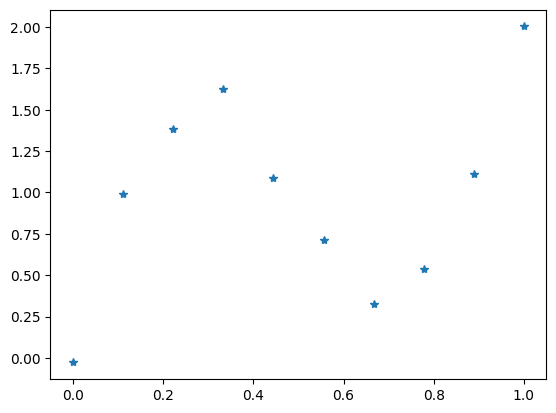

In [115]:
plt.plot(DX, DY, '*')

Train

In [116]:
# Choose the degree
# short_train_poly  does not need initial values. But, it only needs to know len(w) to determine the degree.
#w0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # polynomial degree
w0 = [0, 0, 0, 0, 0] # polynomial degree


w =sctrain(w0, DatXY[0,:], DatXY[1,:])
print(w)

[ -0.07150842  14.17990899 -39.23723974  31.97464856  -4.78975712]


Let's see the trained model on data

In [117]:
# Check training error

D, N = DatXY.shape

ys = [fmodel(DatXY[0,i], w) for i in range(N)]

Training_error = np.sum(np.square(ys - DatXY[1,:]))

print('Training error = ', Training_error)

Training error =  0.0944214740639082


Let's check the plot

[-0.07150842265635457, 1.0620218465047138, 1.4808655134604658, 1.4212234229708183, 1.101845567271266, 0.7209344918614851, 0.4704439980840097, 0.5131823610255257, 0.9979389479362233, 2.0560522735418525]
[0.0, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1.0]


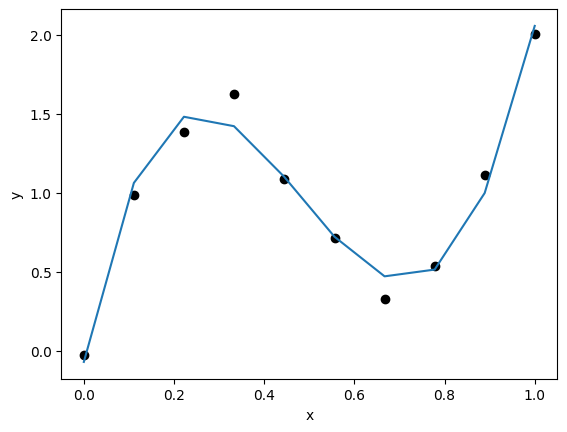

In [118]:
# Now, let's see how it does.

D, N = DatXY.shape

# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
xs = [DatXY[0,i] for i in range(N)]
ys = [fmodel(DatXY[0,i], w) for i in range(N)]
print(ys)
print(xs)
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Illustrative Example

Training error =  1.0547111941658242e-07
[-0.0280019534760342, 0.9880164614596739, 1.3869382522220517, 1.6251351529744904, 1.088810366044381, 0.7131788804208838, 0.32788642891500785, 0.5350462340538797, 1.1119890163772652, 2.0040011610108195]
[0.0, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1.0]


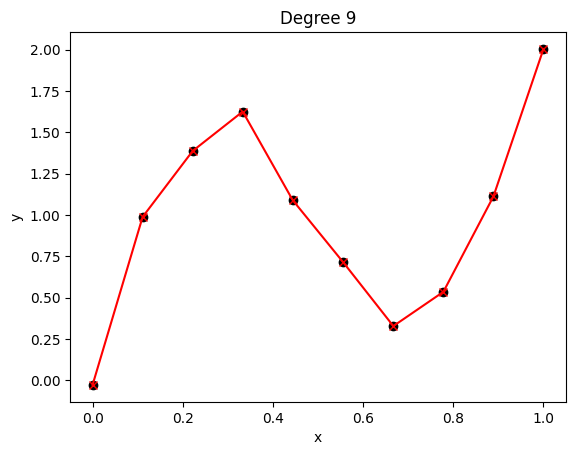

In [119]:
w0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Pick the degree ~ hyperparameter

#w0 = [0, 0]  # Pick the degree ~ hyperparameter

# Train
w =sctrain(w0, DatXY[0,:], DatXY[1,:])

# "Test" (sort of)
D, N = DatXY.shape
ys = [fmodel(DatXY[0,i], w) for i in range(N)]
Training_error = np.sum(np.square(ys - DatXY[1,:]))
print('Training error = ', Training_error)

# Plot
# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
xs = [DatXY[0,i] for i in range(N)]
ys = [fmodel(DatXY[0,i], w) for i in range(N)]
print(ys)
print(xs)
plt.plot(xs, ys, 'rx-')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Degree " + str(len(w)-1))
plt.show()

Is it that perfect?

PAUSE ... PAUSE ... PAUSE


#Reveal



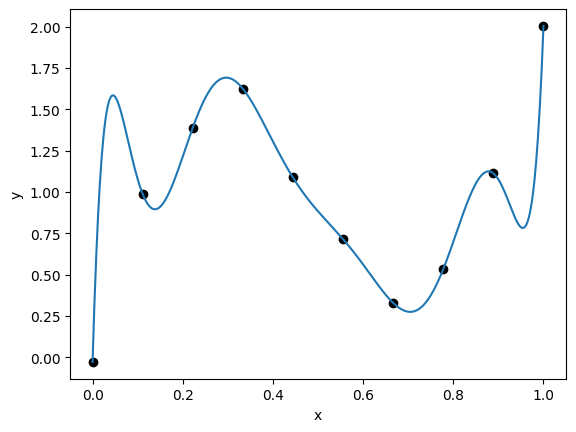

w = 
[-2.80019535e-02  9.29334336e+01 -1.86277092e+03  1.61456844e+04
 -7.38170594e+04  1.96152774e+05 -3.14191479e+05  2.99119866e+05
 -1.55821962e+05  3.41840458e+04]


In [120]:
N = 500
xs = np.linspace(0, 1, num=N)
ys = [fmodel(xs[i], w) for i in range(N)]

# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('w = ')
print(w)

The model fits training data perfectly.

But, it does not capture the underlying behavior of the relation.

This is called "**overfitting**".
The model loses **generalization**.
It fits too well to the training data
and it might not be able to predict well in general (i.e., data it has not seen).

> **Overfitting** is characterized by having small training error, but unproportionally large test error.

The best way to spot overfitting is to use **test dataset**---another dataset not used in training.

See [Model evaluation](#-Model-evaluation-/-model-selection).


#Model evaluation

Since we cannot rely on training data to evaluate our model.

We need **another set** of data to check model sanity.

We need a **Test Set**.

##Separating Data

In [121]:
# To better illustrate this, we will have more data

def gen_data(x):
        N = len(x)
        xp = x*10
        y = np.sin(xp) + 0.2*xp + 0.2*np.random.randn(N)
        
        return y

In [122]:
xs = np.linspace(0, 1, num=500)
ys = gen_data(xs)

In [123]:
# Save the data (Just in case)
DataX = xs.copy()
DataY = ys.copy()

Text(0, 0.5, 'y')

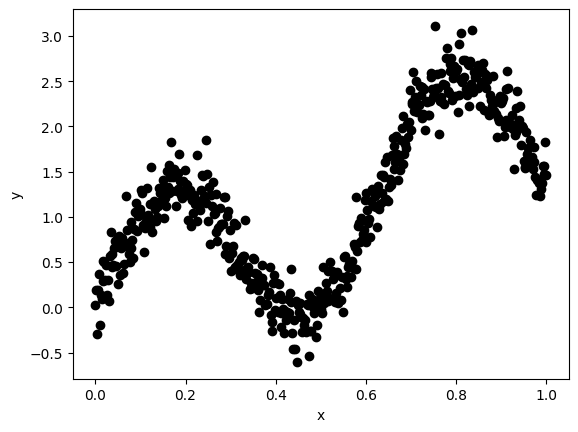

In [124]:
plt.plot(xs, ys, 'ko')
plt.xlabel('x'); plt.ylabel('y')

In [125]:
N = len(xs)
print('N = ', N)

N =  500


In [126]:
Ntrain = int(0.7 * N)
print('Ntrain = ', Ntrain)

Ntrain =  350


### Use IDs to separate

In [127]:
sids = np.random.permutation(np.arange(N))
trainIDs = sids[:Ntrain]
testIDs = sids[Ntrain:]

It's the id that is the key to this randomized separation.

In [128]:
print('train ids = ', trainIDs)
print('test ids = ', testIDs)

train ids =  [367 122 432  90 214  45 170  93 115 157 100 389 130 185 330 391 111 263
 337 409 117 255 155 407 438 357 447 298  51 401 223 348 203 102 190  87
  78 103 125 205 148 179 296 368 490 358 326 470 258 253 110  58 260 454
 378  98 301 149 204 475 196  42 429  75 141 235 276 469 151 171 393 399
 197  73  33  23 238   4 161 466  31 222 256 404 339  50 336 386 494 359
 383 458 195 284 104 338 443 283  72 486 168  29 377 456 430  57 403 306
 181 446 227  81 375 453 177 371 448 392 402 318 325 435  20 355  27  69
 400 272 267 374 146 207 288  18 423 215  21 305 156 228 184 311 134 461
 307 282 406 154 169 277 498 416 176 109 250 245 199 457 108 419 211 175
 350 444 405 265 418 410 474  41 365 269 478 138 376 352 230 244 273 240
 363  88 414 356 445 487 481 320  67 152  59 271  97 254 121 136  74 107
 384 426 131 482   7 193 208 264 314 462 297 449  71 491  92  49 464  55
 173 281 450  99  70  24 382 437 315 412 476   9 128 291 246 442   2 252
  30 353  94 226 467 303 302 133 202 3

*We* can check (for this case).

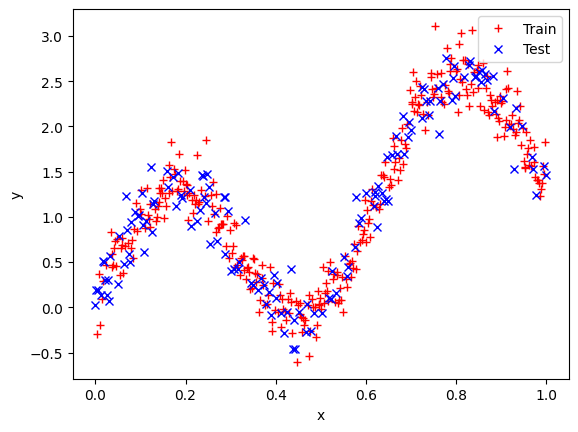

In [129]:
plt.plot(xs[trainIDs], ys[trainIDs], 'r+')
plt.plot(xs[testIDs], ys[testIDs], 'bx')
plt.xlabel('x'); plt.ylabel('y')

plt.legend(["Train", "Test"])

### Wrong way to separate data (I)

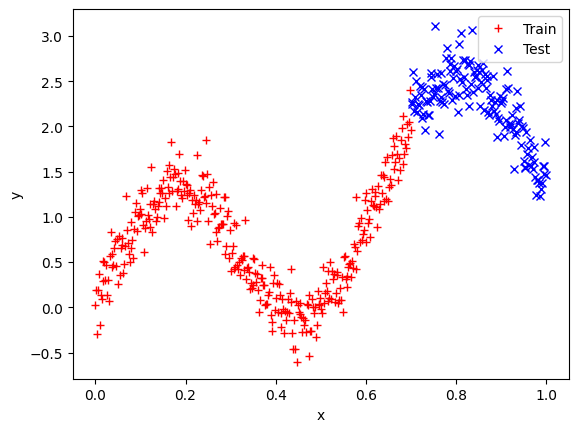

In [130]:
plt.plot(xs[:Ntrain], ys[:Ntrain], 'r+')
plt.plot(xs[Ntrain:], ys[Ntrain:], 'bx')
plt.xlabel('x'); plt.ylabel('y')

plt.legend(["Train", "Test"])

### Wrong way (II)

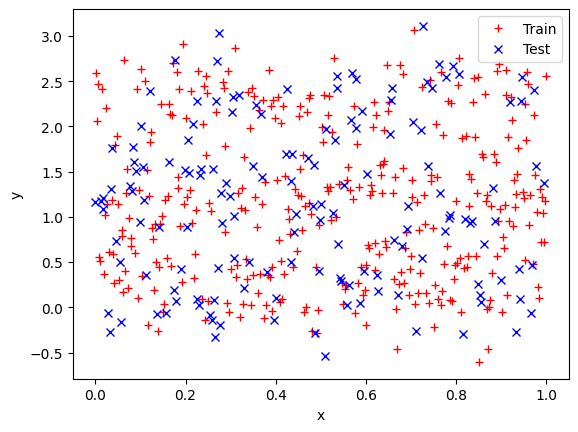

In [131]:
np.random.shuffle(xs)
np.random.shuffle(ys)

plt.plot(xs[:Ntrain], ys[:Ntrain], 'r+')
plt.plot(xs[Ntrain:], ys[Ntrain:], 'bx')
plt.xlabel('x'); plt.ylabel('y')

plt.legend(["Train", "Test"])

Let's take a look back at our data

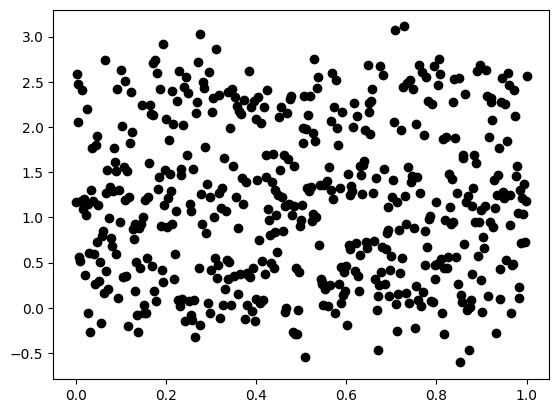

In [132]:
plt.plot(xs, ys, 'ko')

Ah!!!! They are all mixed up!!!


We're screwed!!

Hey! we have a copy, remember?

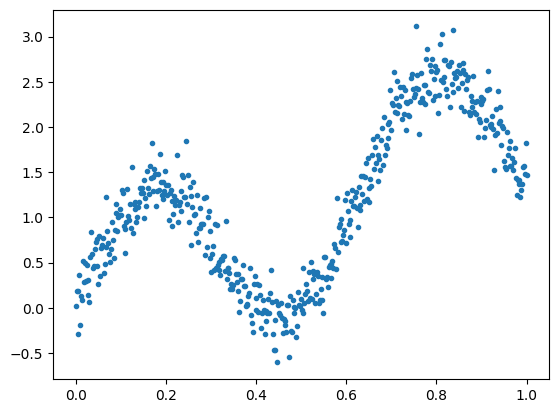

In [133]:
plt.plot(DataX, DataY, ".")

### Use a standard module to separate data


check out [sklearn split data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
print(DataX.shape)
print(DataY.shape)

(500,)
(500,)


In [136]:
#x_train, x_test, y_train, y_test = train_test_split(xs.reshape((-1,1)), ys.reshape((-1,1)), test_size=0.25, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(DataX, DataY, test_size=0.30, random_state=42)

In [137]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(350,)
(350,)
(150,)
(150,)


Text(0, 0.5, 'y')

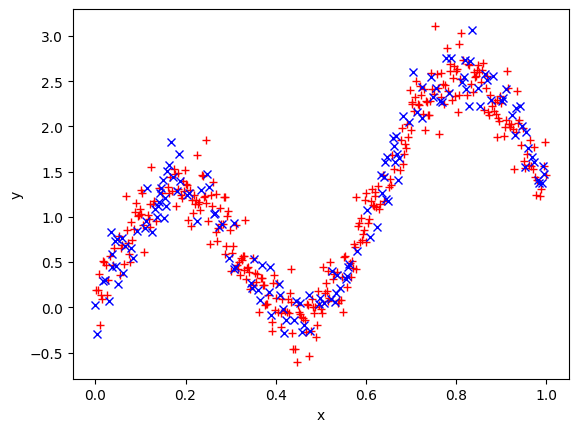

In [138]:
plt.plot(x_train, y_train, 'r+')
plt.plot(x_test, y_test, 'bx')
plt.xlabel('x'); plt.ylabel('y')

#Model selection

In [139]:
# Small set
smallx = np.random.uniform(low=0.0, high=1.0, size=20)
smally = gen_data(smallx)


x_train, x_test, y_train, y_test = train_test_split(smallx, smally, test_size=0.30, random_state=42)

# Large set
#x_train, x_test, y_train, y_test = train_test_split(DataX, DataY, test_size=0.30, random_state=42)



In [140]:
# Prepare training data
trainXY = np.c_[x_train, y_train].T
trainXY.shape

(2, 14)

In [141]:
# Prepara test data
testXY = np.c_[x_test, y_test].T
testXY.shape

(2, 6)

In [142]:
Ms = [1, 2, 3, 4, 5, 6, 7, 10, 13, 15, 18, 19]

train_errs = []
test_errs = []

ws = []

for M in Ms:

  print('Degree ', M)
  w0 = np.random.normal(0, 1, M).T.tolist()

  # Train
  w =sctrain(w0, trainXY[0,:], trainXY[1,:])

  ws.append(w)

  # "Test" (sort of)
  D, N = trainXY.shape
  ys = np.array([fmodel(trainXY[0,i], w) for i in range(N)])
  Training_error = np.sum(np.square(ys - trainXY[1,:]))
  print('* Training error = ', Training_error)
  train_errs.append(Training_error)

  ## Test error
  D, N = testXY.shape
  ys = np.array([fmodel(testXY[0,i], w) for i in range(N)])
  Test_error = np.sum(np.square(ys - testXY[1,:]))
  print('* Test error = ', Test_error)
  test_errs.append(Test_error)

Degree  1
* Training error =  5.3568818709120025
* Test error =  6.6668028792031
Degree  2
* Training error =  2.7428432764000177
* Test error =  3.3855250185839956
Degree  3
* Training error =  2.6442925771389914
* Test error =  4.188906306445207
Degree  4
* Training error =  2.622417867827699
* Test error =  3.9701939969957993
Degree  5
* Training error =  0.30879561982079207
* Test error =  1.1664561415392725
Degree  6
* Training error =  0.2561822953092339
* Test error =  1.391545207655796
Degree  7
* Training error =  0.13006768939185903
* Test error =  0.21205952891260788
Degree  10
* Training error =  0.11906064275769303
* Test error =  1.7714750854036196
Degree  13
* Training error =  572.6985624025286
* Test error =  60115903.34793584
Degree  15
* Training error =  9.841798473429622
* Test error =  537195.774199862
Degree  18
* Training error =  0.12838183415163595
* Test error =  20581.560099524322
Degree  19
* Training error =  0.1628142091041366
* Test error =  13464.351132

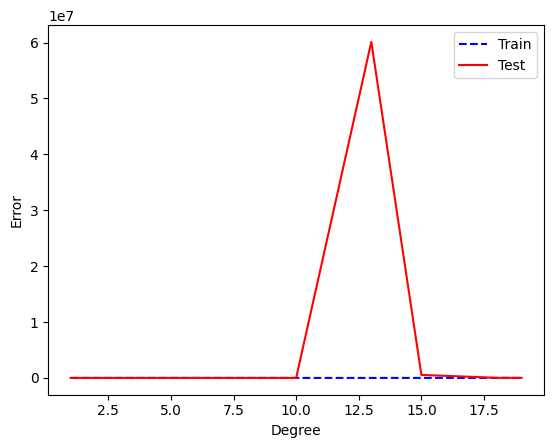

In [143]:
plt.plot(Ms, train_errs, 'b--')
plt.plot(Ms, test_errs, 'r')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])

In [144]:
print("ID:          ", ("\t{};"*len(Ms)).format(*range(len(Ms))))
print("Complexity M:", ("\t{};"*len(Ms)).format(*Ms))
print("Train error: ", ("\t{:0.2f};"*len(train_errs)).format(*train_errs))
print("Test error:  ", ("\t{:0.2f};"*len(test_errs)).format(*test_errs))


ID:           	0;	1;	2;	3;	4;	5;	6;	7;	8;	9;	10;	11;
Complexity M: 	1;	2;	3;	4;	5;	6;	7;	10;	13;	15;	18;	19;
Train error:  	5.36;	2.74;	2.64;	2.62;	0.31;	0.26;	0.13;	0.12;	572.70;	9.84;	0.13;	0.16;
Test error:   	6.67;	3.39;	4.19;	3.97;	1.17;	1.39;	0.21;	1.77;	60115903.35;	537195.77;	20581.56;	13464.35;


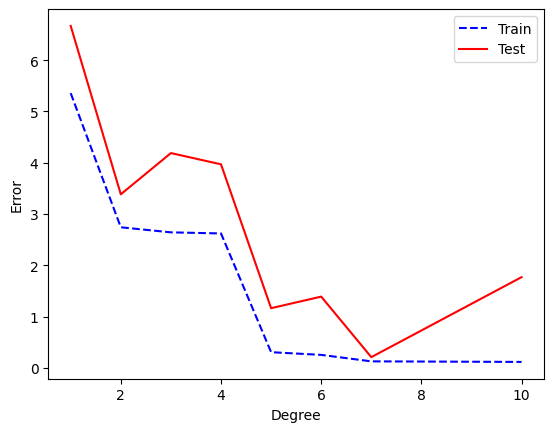

In [145]:
plt.plot(Ms[:-4], train_errs[:-4], 'b--')
plt.plot(Ms[:-4], test_errs[:-4], 'r')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])

To select a model, use test error as a guide.


We usually call test data using for selecting a model "**validation dataset**".

Then, we use another set, "test dataset" to do the final evaluation.

In [146]:
 chosenID = 4
 
 N = 50
 xs = np.linspace(0, 1, num=N)
 ys = np.array([fmodel(xs[i], ws[chosenID]) for i in range(N)])

(-3.0, 4.0)

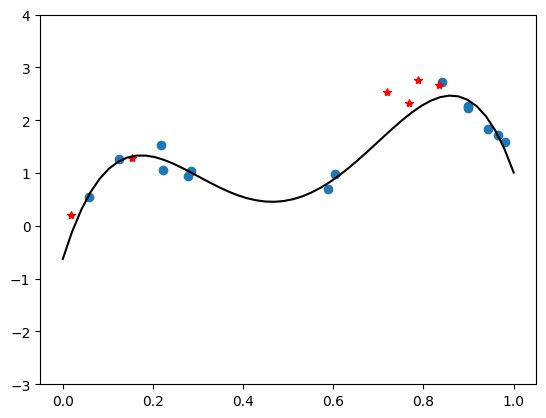

In [147]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test, 'r*')
plt.plot(xs, ys, 'k-')

plt.ylim([-3, 4])

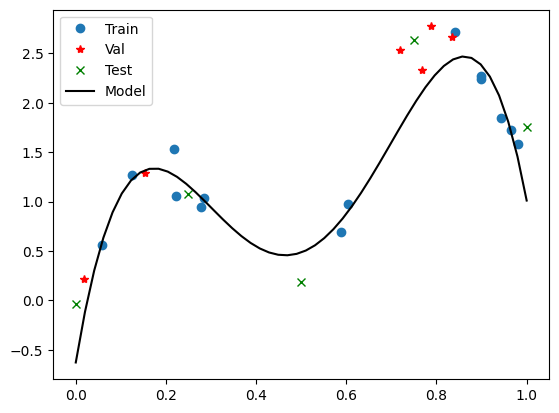

In [148]:
# Once we choose a mode, we should do a final evaluation.
# For convenience, we generate another set of data, i.e., the test set

testevalx = np.linspace(0, 1, num=5)
testevaly = gen_data(testevalx)

TestDatXY = np.array([testevalx, testevaly])

plt.plot(trainXY[0,:], trainXY[1,:], 'o') ## Train
plt.plot(testXY[0,:], testXY[1,:], 'r*') ## Validation
plt.plot(TestDatXY[0,:], TestDatXY[1,:], 'gx') ## Test

plt.plot(xs, ys, 'k-')
plt.legend(['Train', 'Val', 'Test', 'Model'])

In [149]:
D, N = TestDatXY.shape
yp = np.array([fmodel(TestDatXY[0,i], ws[chosenID]) for i in range(N)])
test_error = np.sum(np.square(yp - TestDatXY[1,:]))
print('Final evaluation: test error = ', test_error)


Final evaluation: test error =  1.4418628474528554


#MSE vs SSE

In [150]:
N = 500

testevalx = np.linspace(0, 1, num=N)
testevaly = gen_data(testevalx)

TestDatXY = np.array([testevalx, testevaly])
yp = np.array([fmodel(TestDatXY[0,i], ws[chosenID]) for i in range(N)])
test_error = np.sum(np.square(yp - TestDatXY[1,:]))
print('Final evaluation: test error = ', test_error)

Final evaluation: test error =  63.27750594406067


In practice, it is more convenient to use MSE, rather than SSE.

In [151]:
N = 500

testevalx = np.linspace(0, 1, num=N)
testevaly = gen_data(testevalx)

TestDatXY = np.array([testevalx, testevaly])
yp = np.array([fmodel(TestDatXY[0,i], ws[chosenID]) for i in range(N)])
mse = np.mean(np.square(yp - TestDatXY[1,:]))
print('Final evaluation: mse = ', mse)

# MSE is less sensitive to a number of datapoints.

Final evaluation: mse =  0.13627557584905628


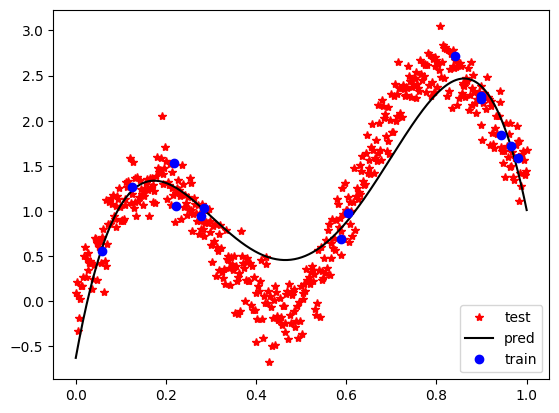

In [152]:
plt.plot(testevalx, testevaly, 'r*')
plt.plot(testevalx, yp, 'k-')
plt.plot(x_train, y_train, 'bo')
plt.legend(['test', 'pred', 'train'], loc='lower right')

Life is as good as it gets.

---

**The End.**

#Countermeasure to overfitting



*   Use a less complex model, e.g., lower degree
*   Have more data
*   Regularization   


##Use less complexity

Training error =  0.10319529022050115


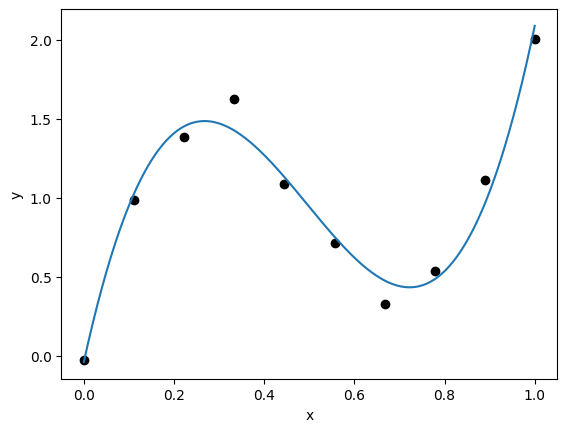

In [153]:
w0 = [0, 0, 0, 0]  

# Train
w =sctrain(w0, DatXY[0,:], DatXY[1,:])

# "Test" (sort of)
D, N = DatXY.shape
ys = [fmodel(DatXY[0,i], w) for i in range(N)]
Training_error = np.sum(np.square(ys - DatXY[1,:]))
print('Training error = ', Training_error)

# Plot
N = 500; xs = np.linspace(0, 1, num=N); ys = [fmodel(xs[i], w) for i in range(N)]

# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
plt.plot(xs, ys); plt.xlabel('x'); plt.ylabel('y'); plt.show()

##Use more data

In general, acquisition of data is costly.

For illustration, let's generate data:

$$y = sin(x) + x + \epsilon$$

In [154]:
xs = np.linspace(0, 1, num=80)
ys = gen_data(xs)

DatXY = np.array([xs, ys])

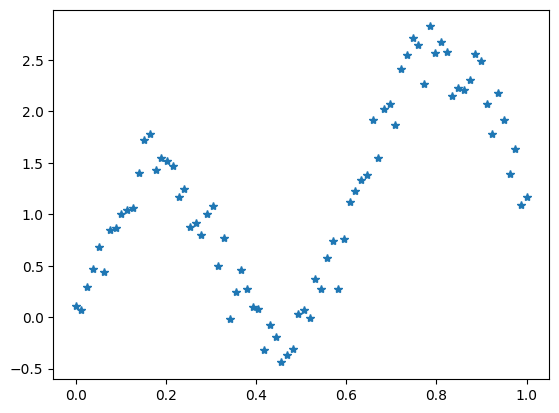

In [155]:
plt.plot(DatXY[0,:], DatXY[1,:], '*')

Training error =  2.8644842070417313


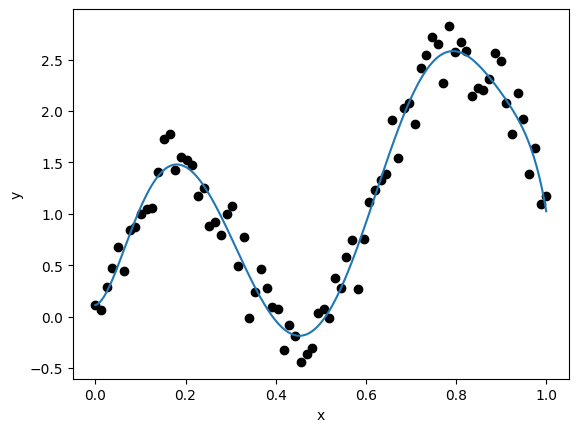

In [156]:
w0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  

# Train
w =sctrain(w0, DatXY[0,:], DatXY[1,:])

# "Test" (sort of)
D, N = DatXY.shape
ys = [fmodel(DatXY[0,i], w) for i in range(N)]
Training_error = np.sum(np.square(ys - DatXY[1,:]))
print('Training error = ', Training_error)

# Plot
N = 500
xs = np.linspace(0, 1, num=N)
ys = [fmodel(xs[i], w) for i in range(N)]

# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##Do regularization

There are many **regularization** techniques.
But, here, we will see "**weight decay**".

loss:

$$E = \frac{1}{2}\sum_n (\hat{y} - y)^2 + \frac{\lambda}{2} \sum_m w_m^2$$

where $\lambda \geq 0$.

Lambda is called "**Lagrange parameter**".

In [157]:
def shortcut_train_polyW8DK(w, DataXY, lm=1):
    '''
    Y [1 x N] = w [1 x M] * Phi [M x N]

    Grad [M x 1] = Phi [M x N] * (Y' [N x 1] - T' [N x 1]) + lambda * w'
    Therefore,
        Grad    = Phi [M x N] * (Phi'*w' - T' [N x 1]) + lambda * w'
                = Phi*Phi'*w' - Phi*T' + lambda * w'.
    Thus, at Grad = 0, w' = Phi*T' * inv(Phi*Phi')
    '''
    assert DataXY.shape[0] == 2

    M = len(w)
    d, N = DataXY.shape

    X = DataXY[0,:]
    T = DataXY[1,:]


    # Compose Phi matrix [M x N]
    Phi = np.vstack((np.ones((1, N)),
            np.tile(X, (M-1, 1))
            ))

    Phi = np.cumprod(Phi, axis=0)

    A = np.dot(Phi, Phi.T) + lm * np.diag(np.ones(M))
    b = np.dot(Phi, T.T)

    w = np.linalg.solve(A, b)

    return w

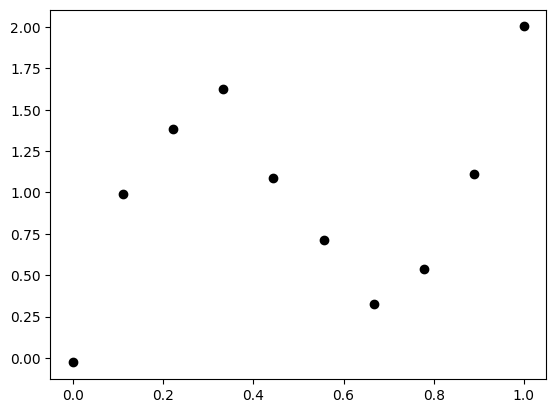

In [158]:
DX = [0.000, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1]
DY = [-0.028, 0.988, 1.387, 1.625, 1.089, 0.713, 0.328, 0.535, 1.112, 2.004]

DatXY = np.array([DX, DY])
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

In [159]:
w0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  

# Train
w = shortcut_train_polyW8DK(w0, DatXY, lm=1e-12) # try lm: 0, 1e-13, 1e-12, 1e-6
w

array([-2.70633683e-02,  2.60662904e+01, -3.22679279e+02,  2.31958689e+03,
       -9.08598013e+03,  2.03848669e+04, -2.72727770e+04,  2.16154896e+04,
       -9.37851154e+03,  1.71596882e+03])

Training error =  0.019407213743189197


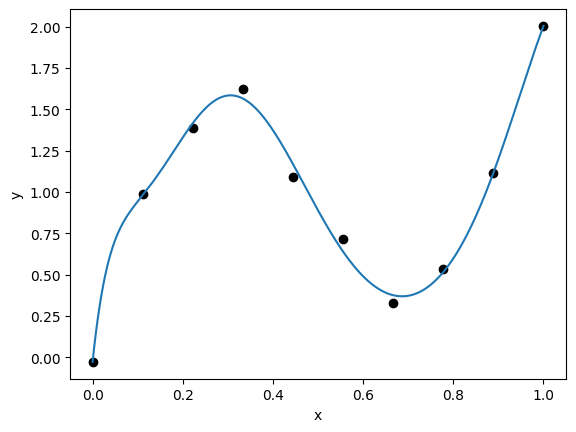

In [160]:
# "Test" (sort of)
D, N = DatXY.shape
ys = [ fmodel(DatXY[0,i], w) for i in range(N)]
Training_error = np.sum(np.square(ys - DatXY[1,:]))
print('Training error = ', Training_error)

# Plot
N = 500
xs = np.linspace(0, 1, num=N)
ys = [fmodel(xs[i], w) for i in range(N)]

# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Ending note on evaluation metric

Another metric widely used for regression is R-square.

$$R^2 = 1 - \frac{\sum_n (\hat{y}_n - y_n)^2}{\sum_n (\bar{y} - y_n)^2 }$$

In [161]:
r2 = 1- np.sum( np.square(yp - TestDatXY[1,:]) )/np.sum( np.square( np.mean(TestDatXY[1,:]) - TestDatXY[1,:]) )
print('r2 =', r2)

r2 = 0.8218085378108999


## Standard R-square

In [162]:
from sklearn.metrics import r2_score

r2_score(TestDatXY[1,:], yp)

0.8218085378108999